# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar
filename = "Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
df_all = pd.read_csv(filename) 
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes = list(focuscrimes)
df = df_all.loc[df_all['Category'].isin(focuscrimes)].copy()
# df = df_all.loc[df_all['Category'].isin(focuscrimes)] # filter by focuscrimes, 后面会报错，因为Pandas 并不能确定该 slice 是从原始 DataFrame 中复制的还是引用的
# df = df_all.where(df_all.Category.isin(focuscrimes)) # filter by focuscrimes，将不符合条件的行替换成 NaN 值
focuscrimes = sorted(focuscrimes, key=lambda x: x[0]) # sort by first letter ABCDE
# drop year 2018
df = df.loc[df['Date'].str.contains('2018') == False]

In [2]:
df['Date']  = df['Date'].astype('datetime64') # convert to datetime(11/22/2004 to 2004-11-22)
df['Time']  = df['Time'].astype('datetime64') # 17:50 to 17:50:00
# df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
# df['Time'] = pd.to_datetime(df['Time'], format="%H:%M")
df['Year']  = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# change month number to month name
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x]) # 缩写的月份，month_name是全称
df['Hour']  = df['Time'].dt.hour
df['168_Hour_of_week'] = df['Date'].dt.dayofweek * 24 + (df['Hour'] + 1) # df.dt.dayofweek: Mon = 0，Sun = 6, 168h不需要考虑是哪个月的第几周

## week of day

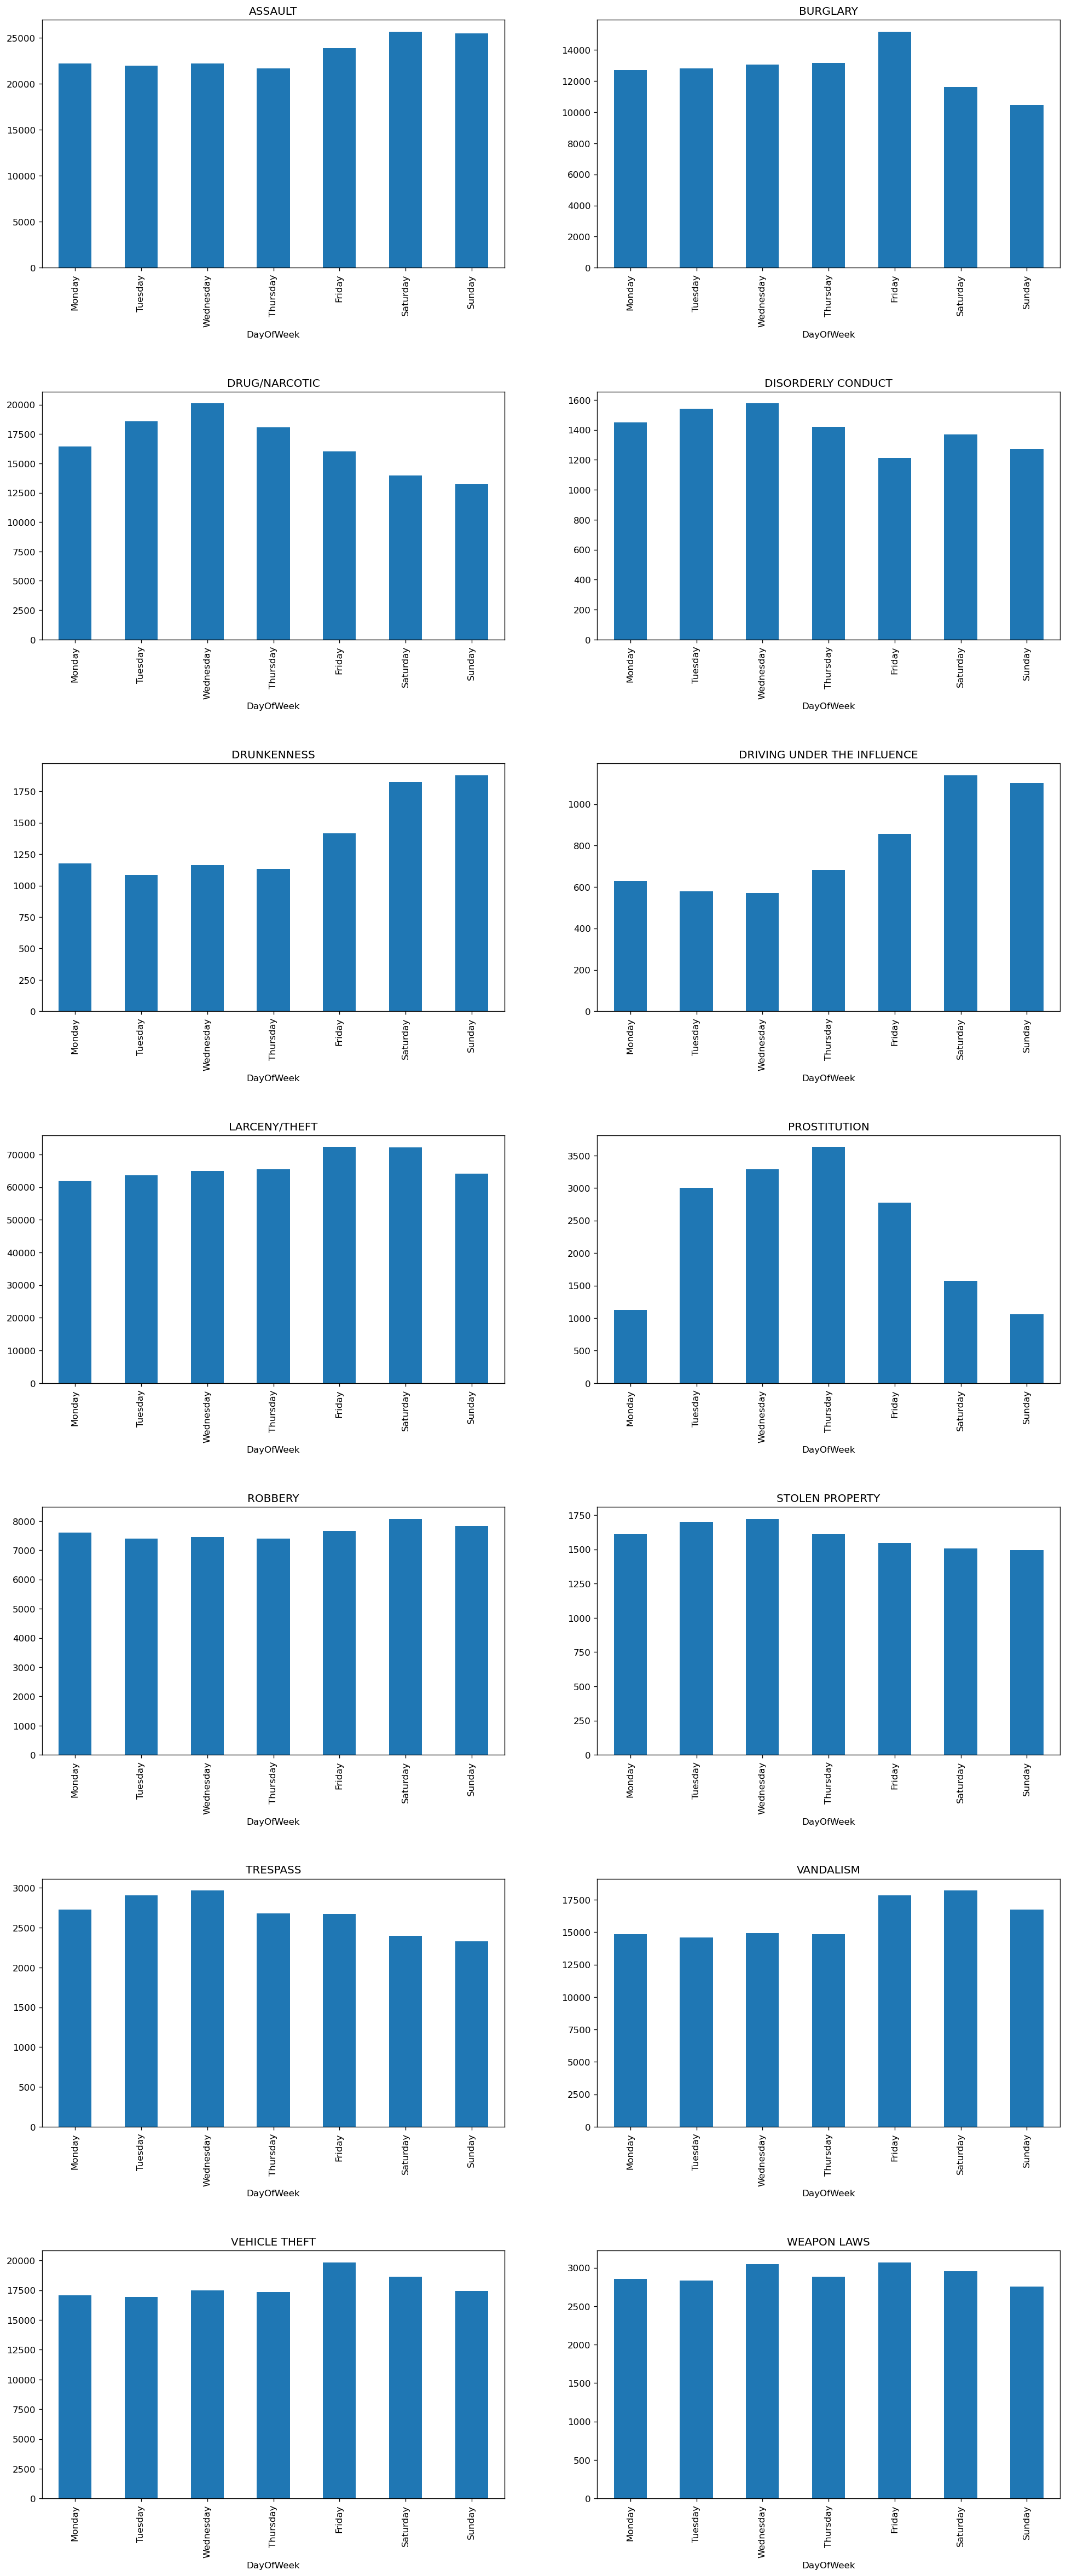

In [3]:
fig = plt.figure(figsize=(20, 50), dpi=120) # dpi: dots per inch,图像分辨率

for i, category in enumerate(focuscrimes): # i是索引，category是值
    plt.subplot(7, 2, i+1) # 7行2列，第i+1个
    df1 = df[df.Category == category] # 每次都等于一类犯罪
    df_count = df1.groupby(df1['DayOfWeek']).count() # <class 'pandas.core.frame.DataFrame'>
    # ts = df_count['IncidntNum'] # <class 'pandas.core.series.Series'>
    # weekly_ts = ts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']) # 重排索引
    # colors = plt.cm.gray(np.linspace(0, 1, len(weekly_ts))) # 颜色和数据密度并不匹配
    # 生成颜色和密度匹配的colors
    # max = df_count['Category'].max()
    # colors = plt.cm.Purples(df_count['Category'].values/float(np.max(df_count['Category'].values))) # 需要df_count按照周一到周日排序，不搞了意义不大
    df_count['IncidntNum'][['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']].plot(kind='bar', title = category)
    # 原本的weekday排序不是按照周一到周日的顺序，所以需要重新排序
plt.subplots_adjust(hspace = .5) # 调整子图纵向间距

# 如果纵轴的坐标一样，有的图会被挤压，还是要看想要什么信息
# plt.yticks(np.arange(0, 30000, 5000))
# fig.tight_layout()


## Monthly

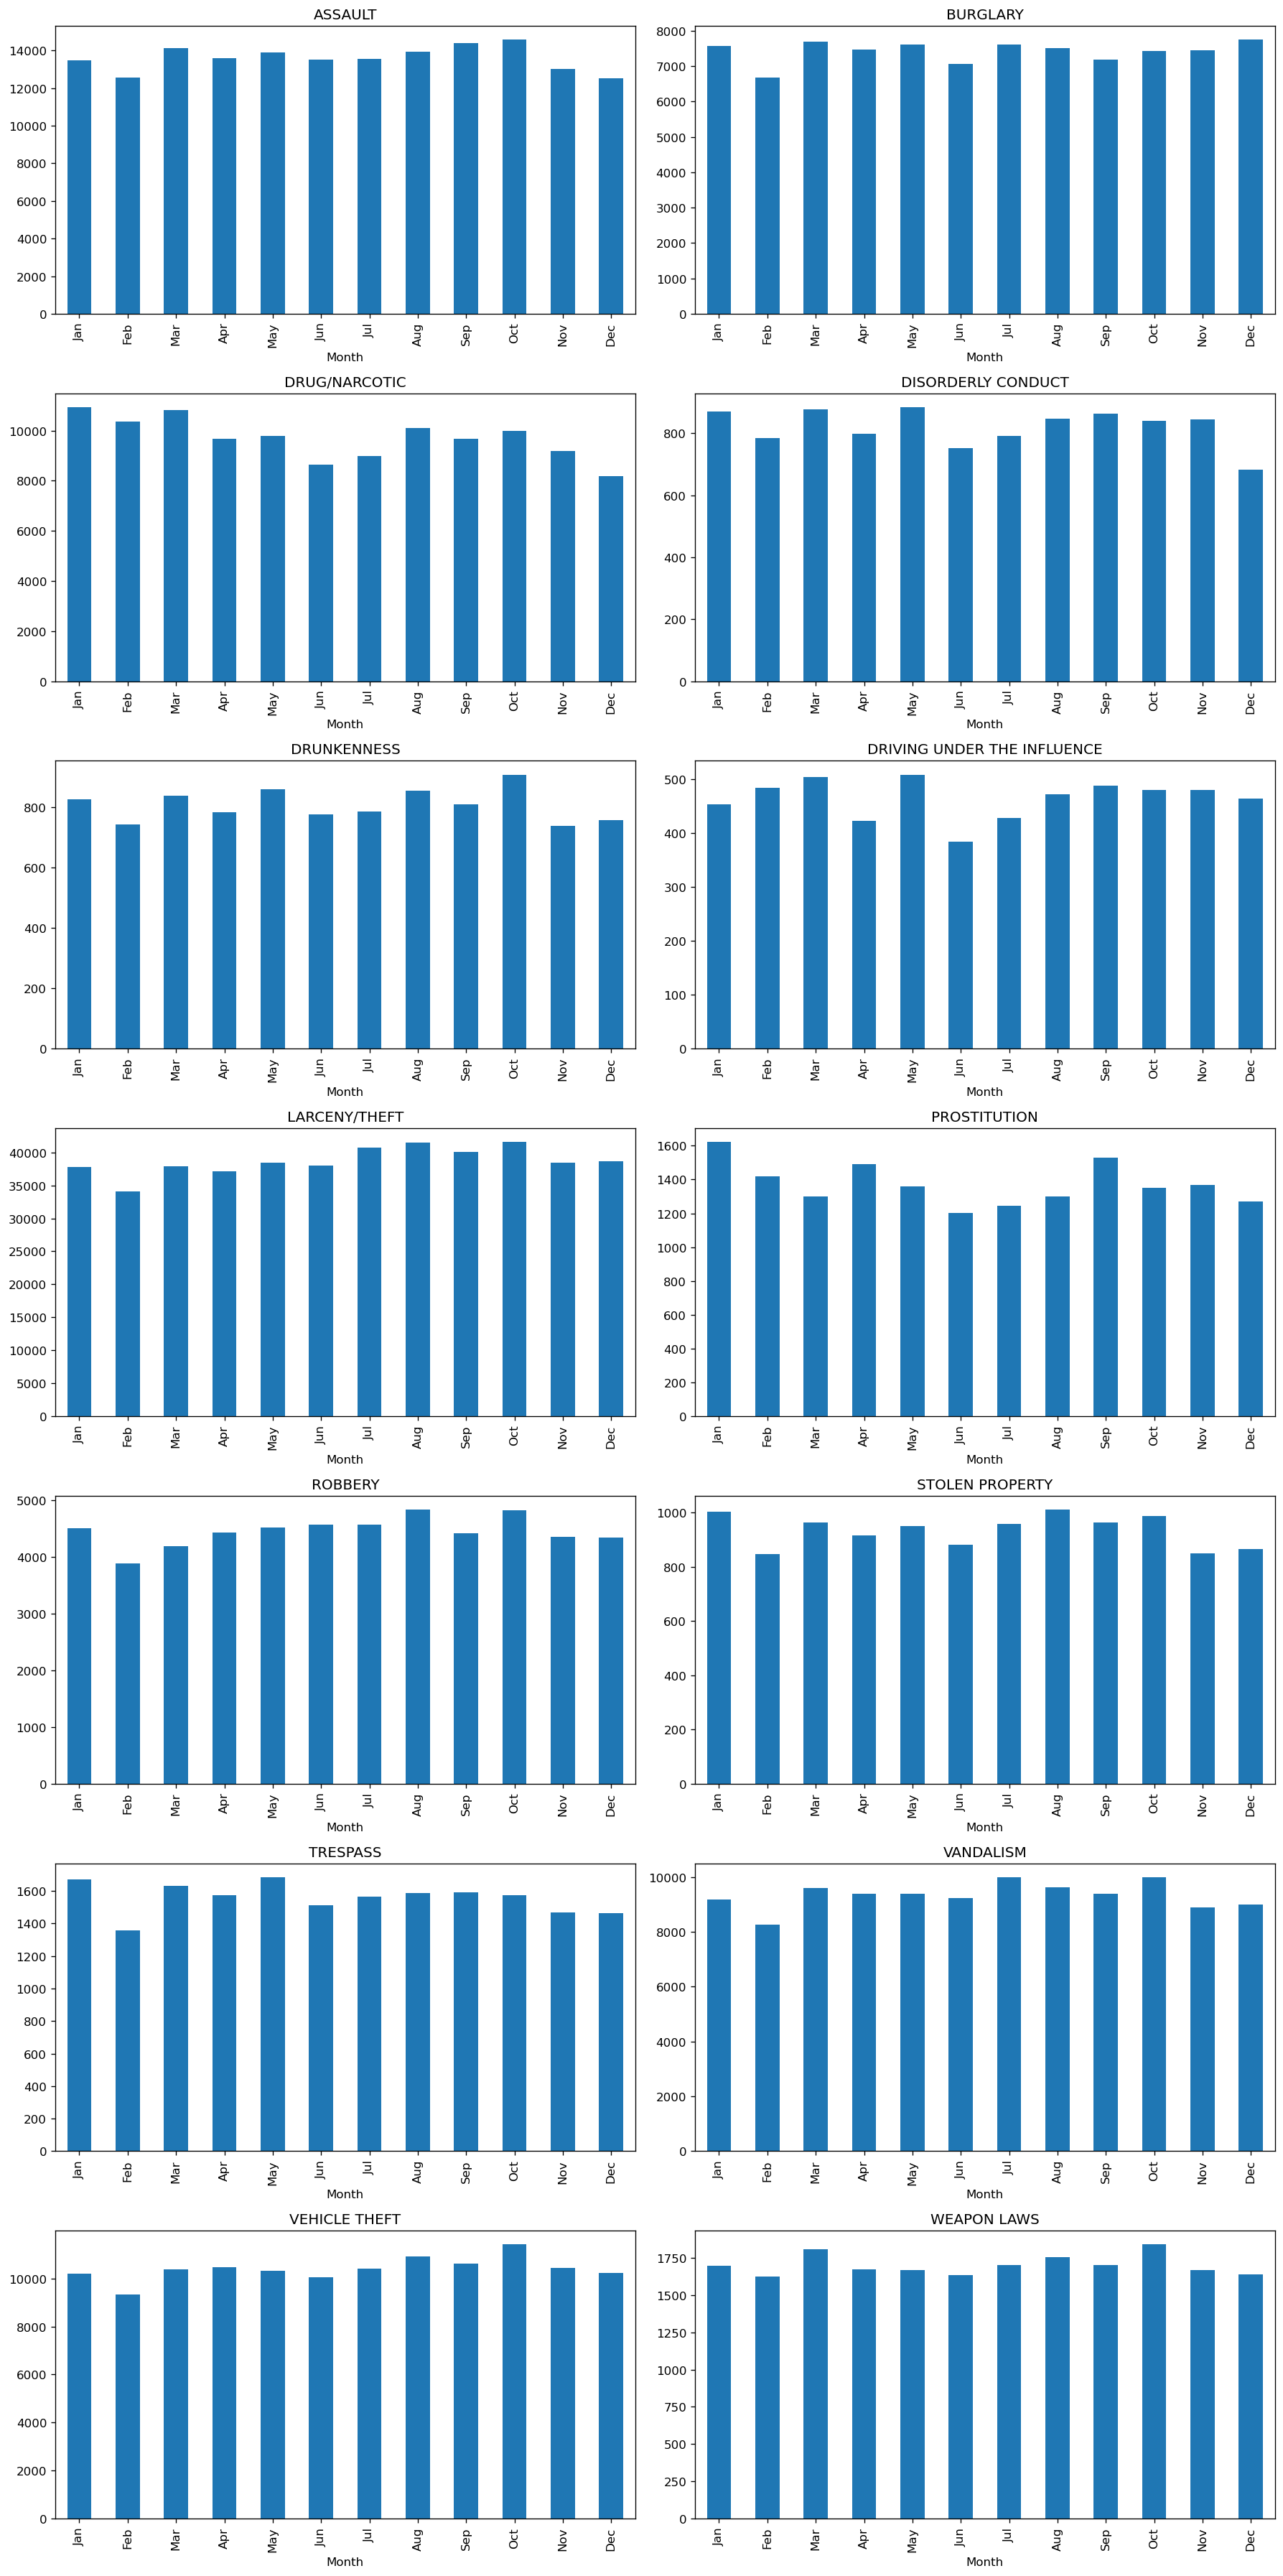

In [4]:
fig = plt.figure(figsize=(15, 30), dpi=120) # dpi: dots per inch,图像分辨率

for i, category in enumerate(focuscrimes):
    plt.subplot(7, 2, i+1)
    df1 = df[df.Category == category]
    df_count = df1.groupby(df1['Month']).count()
    df_count['IncidntNum'][["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]].plot(kind='bar', title = category) # 不需要重排索引，因为月份是从1到12  
# plt.subplots_adjust(hspace = .5)
fig.tight_layout()

## 24 hours

In [ ]:
fig = plt.figure(figsize=(15, 30), dpi=120) # dpi: dots per inch,图像分辨率

for i, category in enumerate(focuscrimes):
    plt.subplot(7, 2, i+1)
    df1 = df[df.Category == category]
    df_count = df1.groupby(df1['Hour']).count()
    df_count['IncidntNum'].plot(kind='bar', title = category) # 不需要重排索引，因为月份是从1到12  
# plt.subplots_adjust(hspace = .5)
fig.tight_layout()

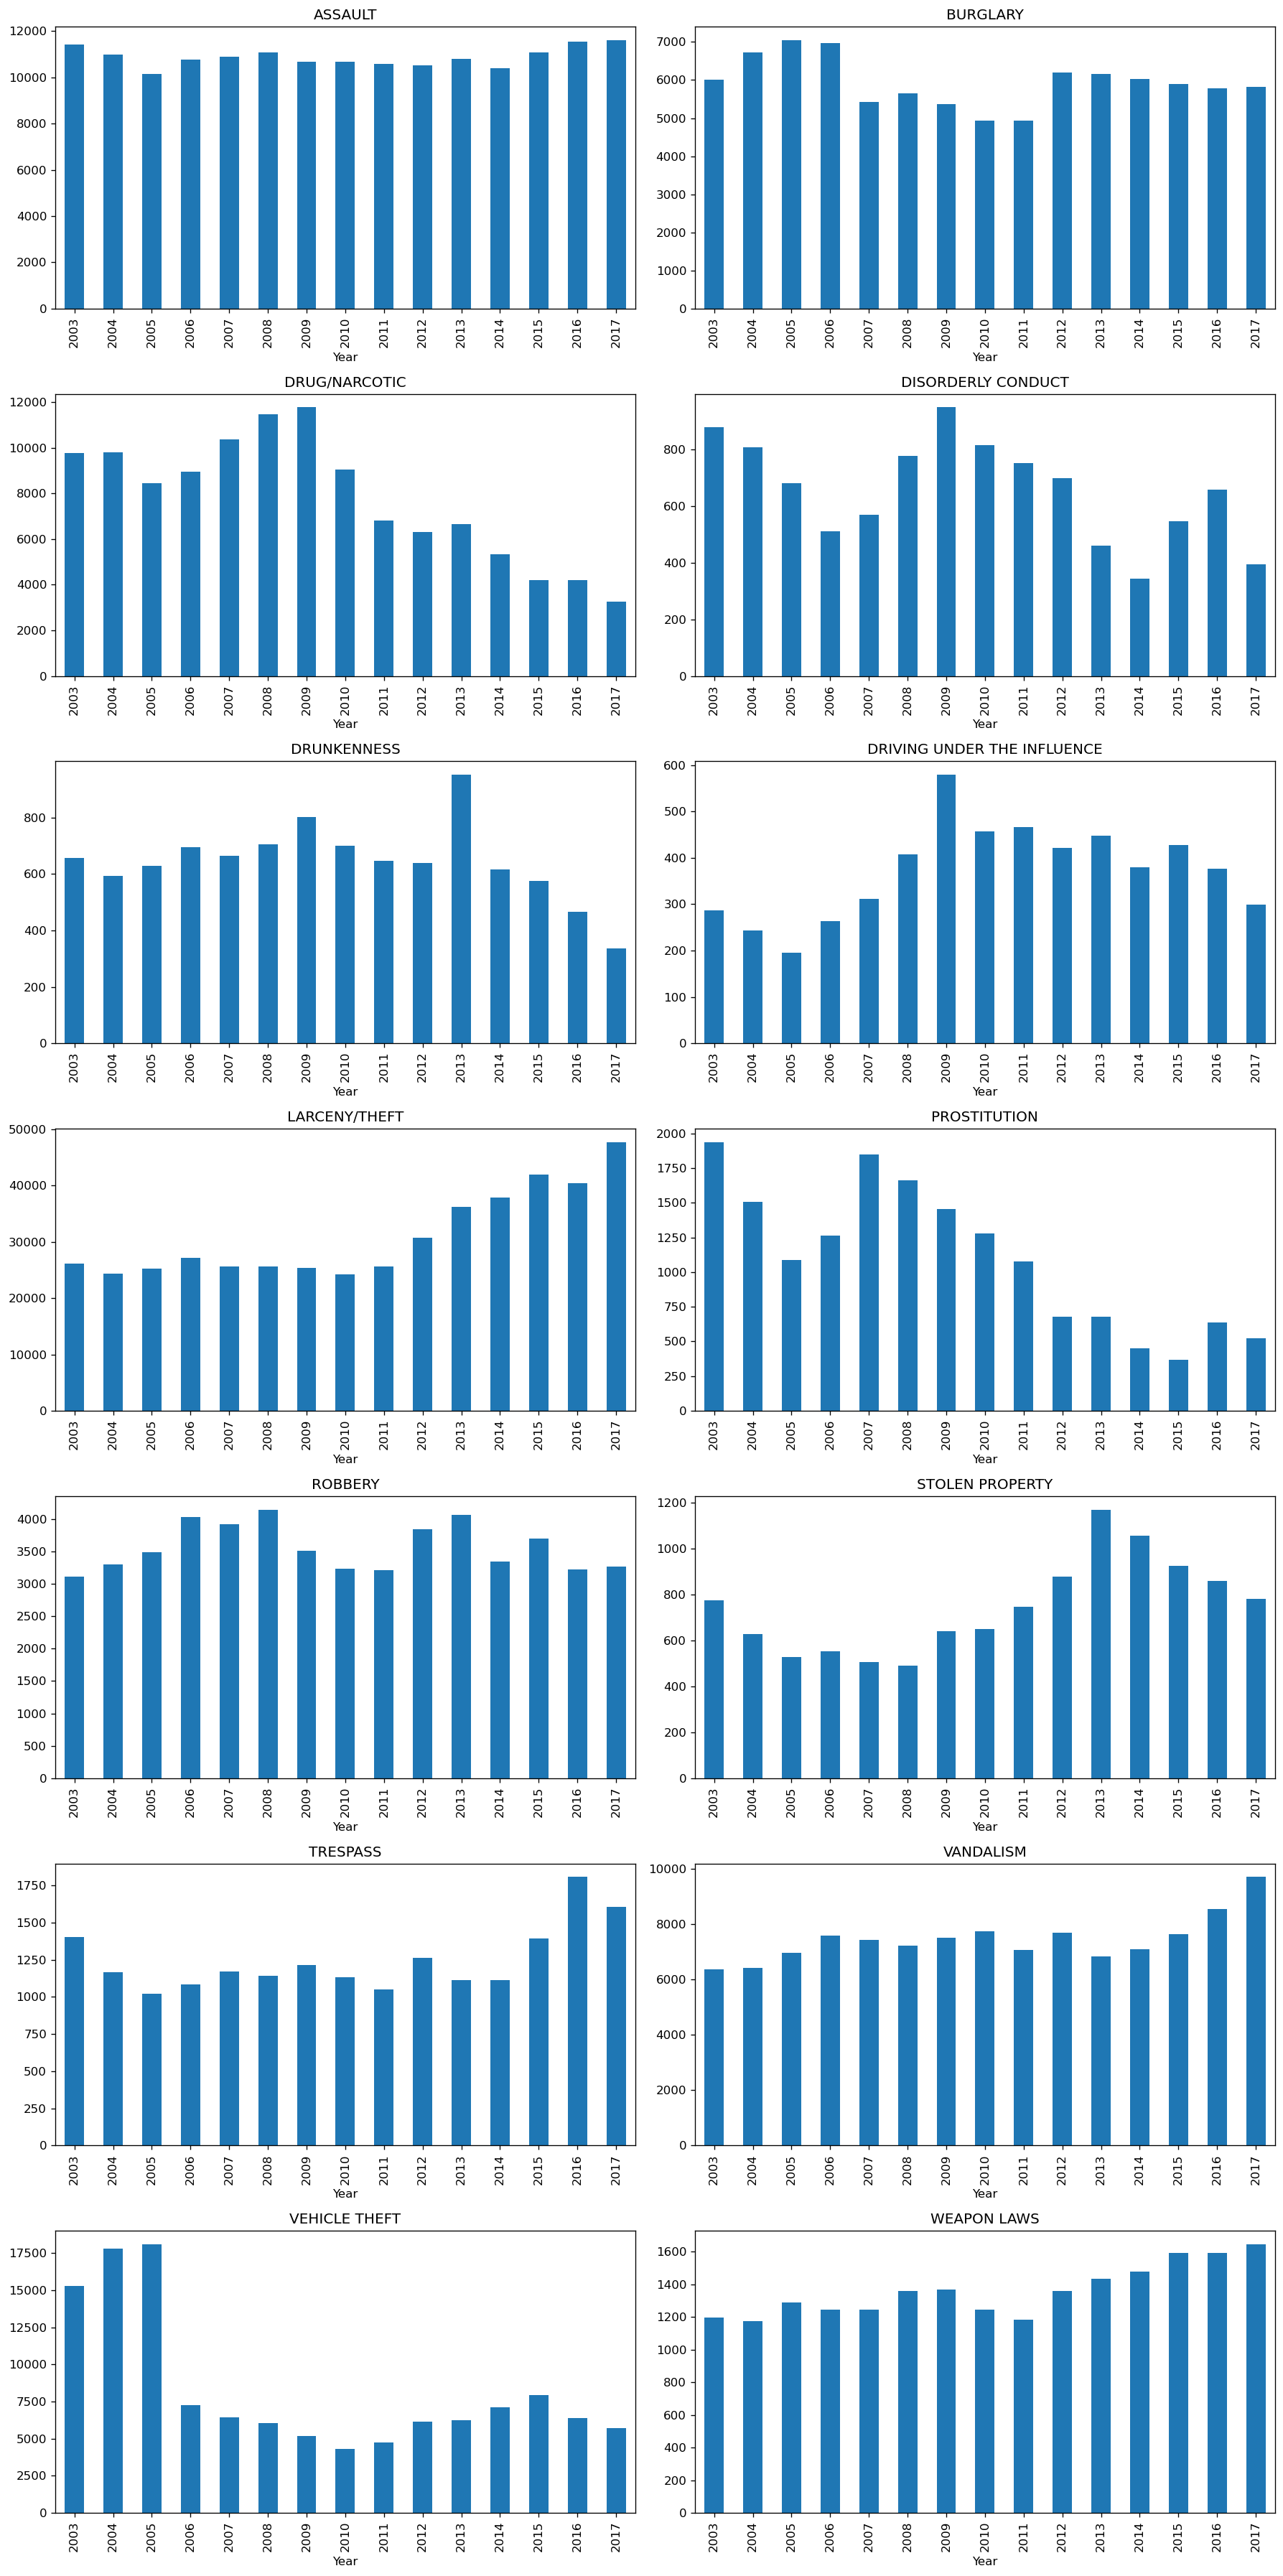

In [14]:
fig = plt.figure(figsize=(15, 30), dpi=120) # dpi: dots per inch,图像分辨率

for i, category in enumerate(focuscrimes):
    plt.subplot(7, 2, i+1)
    df1 = df[df.Category == category]
    df_count = df1.groupby(df1['Year']).count()
    df_count['IncidntNum'].plot(kind='bar', title = category) # 不需要重排索引，因为月份是从1到12  
# plt.subplots_adjust(hspace = .5)
fig.tight_layout()

## 168 hours

In [ ]:
# Define location of x-ticks
xticks = np.linspace(0, 144, 7)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
# Create plots
fig, axs = plt.subplots(7, 2, figsize=(20, 50))
c = 0
for i in range(2):
    for j in range(7):
        df1 = df[df.Category == category]
        df_count = df1.groupby(df1['168_Hour_of_week']).count()
        df_count['IncidntNum'].plot(kind='bar', title = category,ax=axs[j,i]) # 不需要重排索引，因为月份是从1到12 
        axs[j,i].set_title(list(focuscrimes)[c])
        axs[j,i].set_xticks(xticks)
        axs[j,i].set_xticklabels(days)
        c+=1
fig.tight_layout()

**P1.2**: Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

In [5]:
# %pip install calplot
import calplot # calendar plot

(<Figure size 4000x8800 with 15 Axes>,
 array([<AxesSubplot:ylabel='2003'>, <AxesSubplot:ylabel='2004'>,
        <AxesSubplot:ylabel='2005'>, <AxesSubplot:ylabel='2006'>,
        <AxesSubplot:ylabel='2007'>, <AxesSubplot:ylabel='2008'>,
        <AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
        <AxesSubplot:ylabel='2017'>], dtype=object))

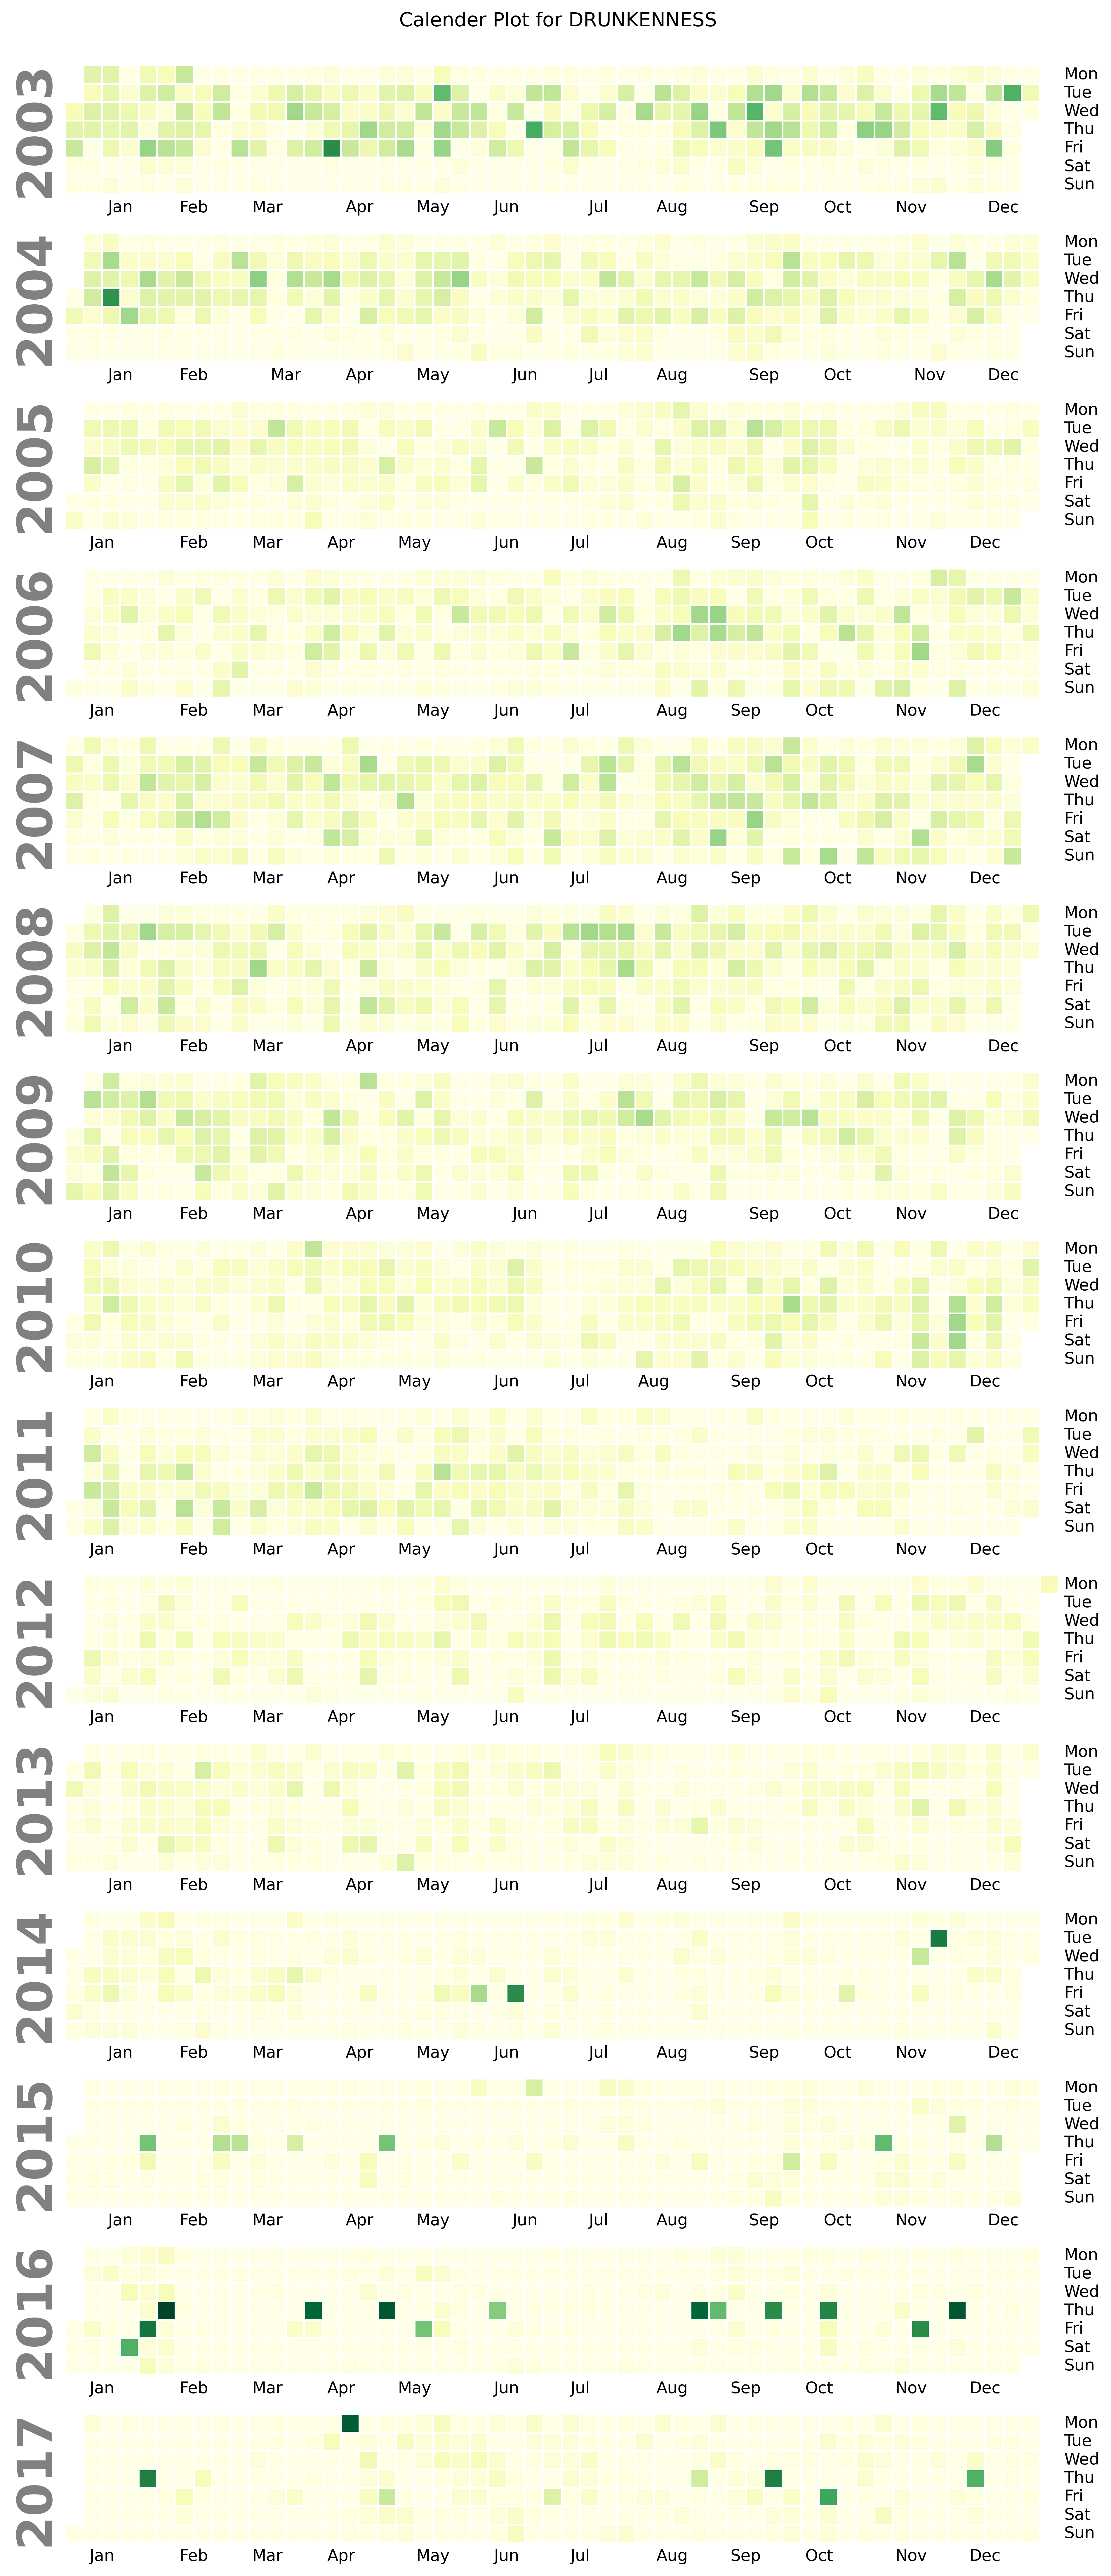

In [15]:
df_drunk = df[df.Category == 'PROSTITUTION']
df_count = df_drunk.groupby(df_drunk['Date']).count()
calplot.calplot(df_count["IncidntNum"], cmap='YlGn', figsize=(10,22), edgecolor=None, 
                fig_kws=dict(dpi=400, layout='tight'), colorbar=False,
                suptitle="Calender Plot for DRUNKENNESS", linewidth=.8)
# calplot.calplot(df_count["IncidntNum"], cmap='YlGn', colorbar=False)

In [ ]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

(<Figure size 4000x8800 with 15 Axes>,
 array([<AxesSubplot:ylabel='2003'>, <AxesSubplot:ylabel='2004'>,
        <AxesSubplot:ylabel='2005'>, <AxesSubplot:ylabel='2006'>,
        <AxesSubplot:ylabel='2007'>, <AxesSubplot:ylabel='2008'>,
        <AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
        <AxesSubplot:ylabel='2017'>], dtype=object))

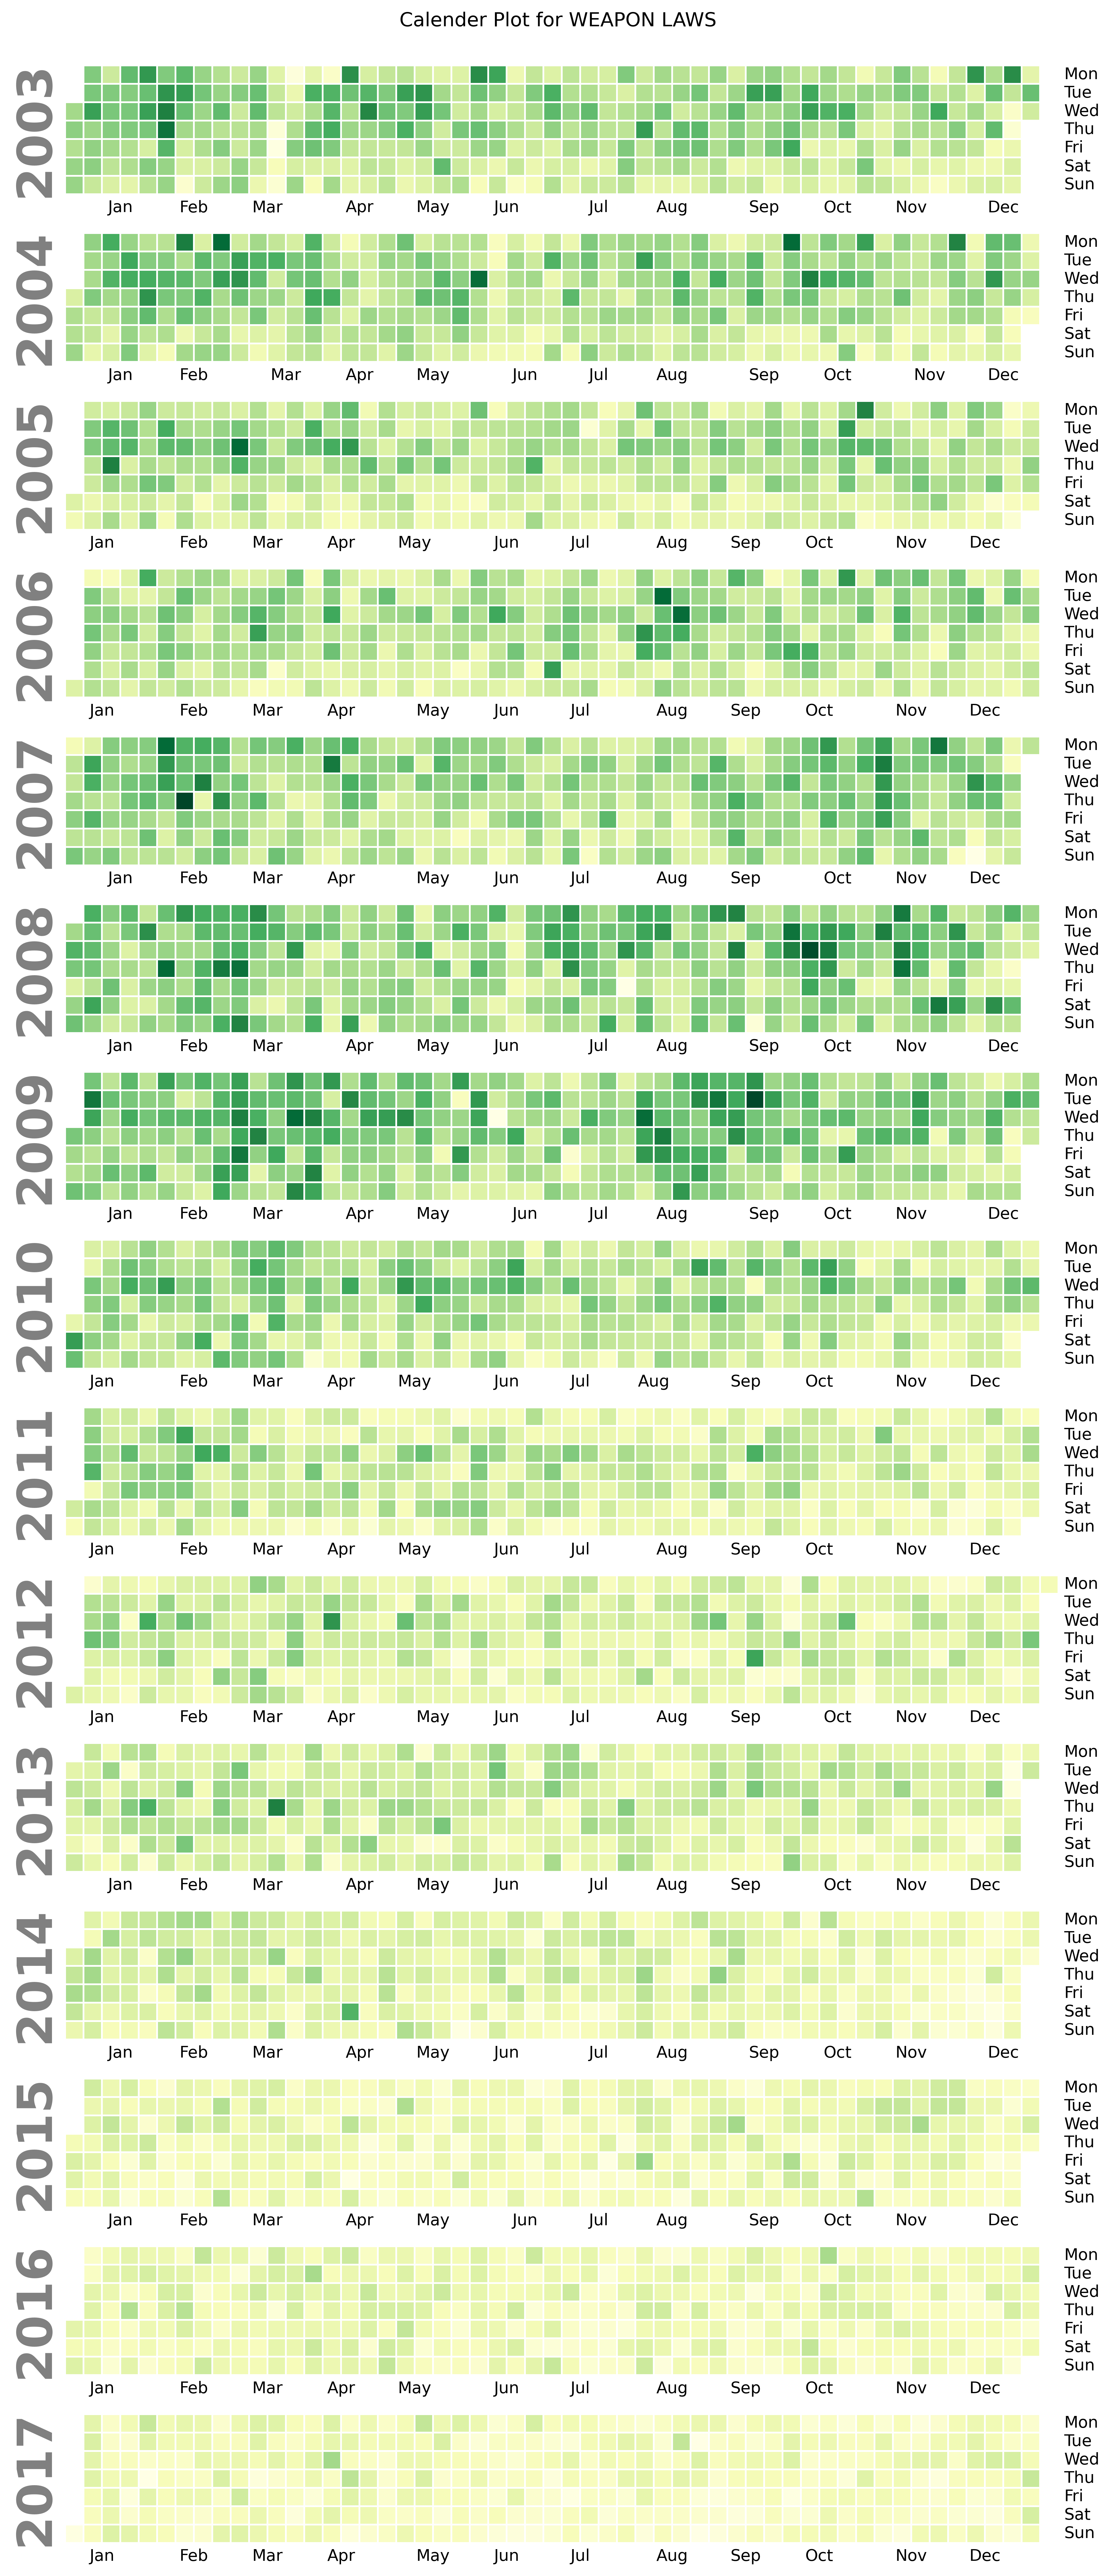

In [16]:
df_drunk = df[df.Category == 'DRUG/NARCOTIC']
df_count = df_drunk.groupby(df_drunk['Date']).count()
calplot.calplot(df_count["IncidntNum"], cmap='YlGn', figsize=(10,22), edgecolor=None, 
                fig_kws=dict(dpi=400, layout='tight'), colorbar=False,
                suptitle="Calender Plot for WEAPON LAWS", linewidth=.8)
# calplot.calplot(df_count["IncidntNum"], cmap='YlGn', colorbar=False)

(<Figure size 4000x8800 with 15 Axes>,
 array([<AxesSubplot:ylabel='2003'>, <AxesSubplot:ylabel='2004'>,
        <AxesSubplot:ylabel='2005'>, <AxesSubplot:ylabel='2006'>,
        <AxesSubplot:ylabel='2007'>, <AxesSubplot:ylabel='2008'>,
        <AxesSubplot:ylabel='2009'>, <AxesSubplot:ylabel='2010'>,
        <AxesSubplot:ylabel='2011'>, <AxesSubplot:ylabel='2012'>,
        <AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
        <AxesSubplot:ylabel='2017'>], dtype=object))

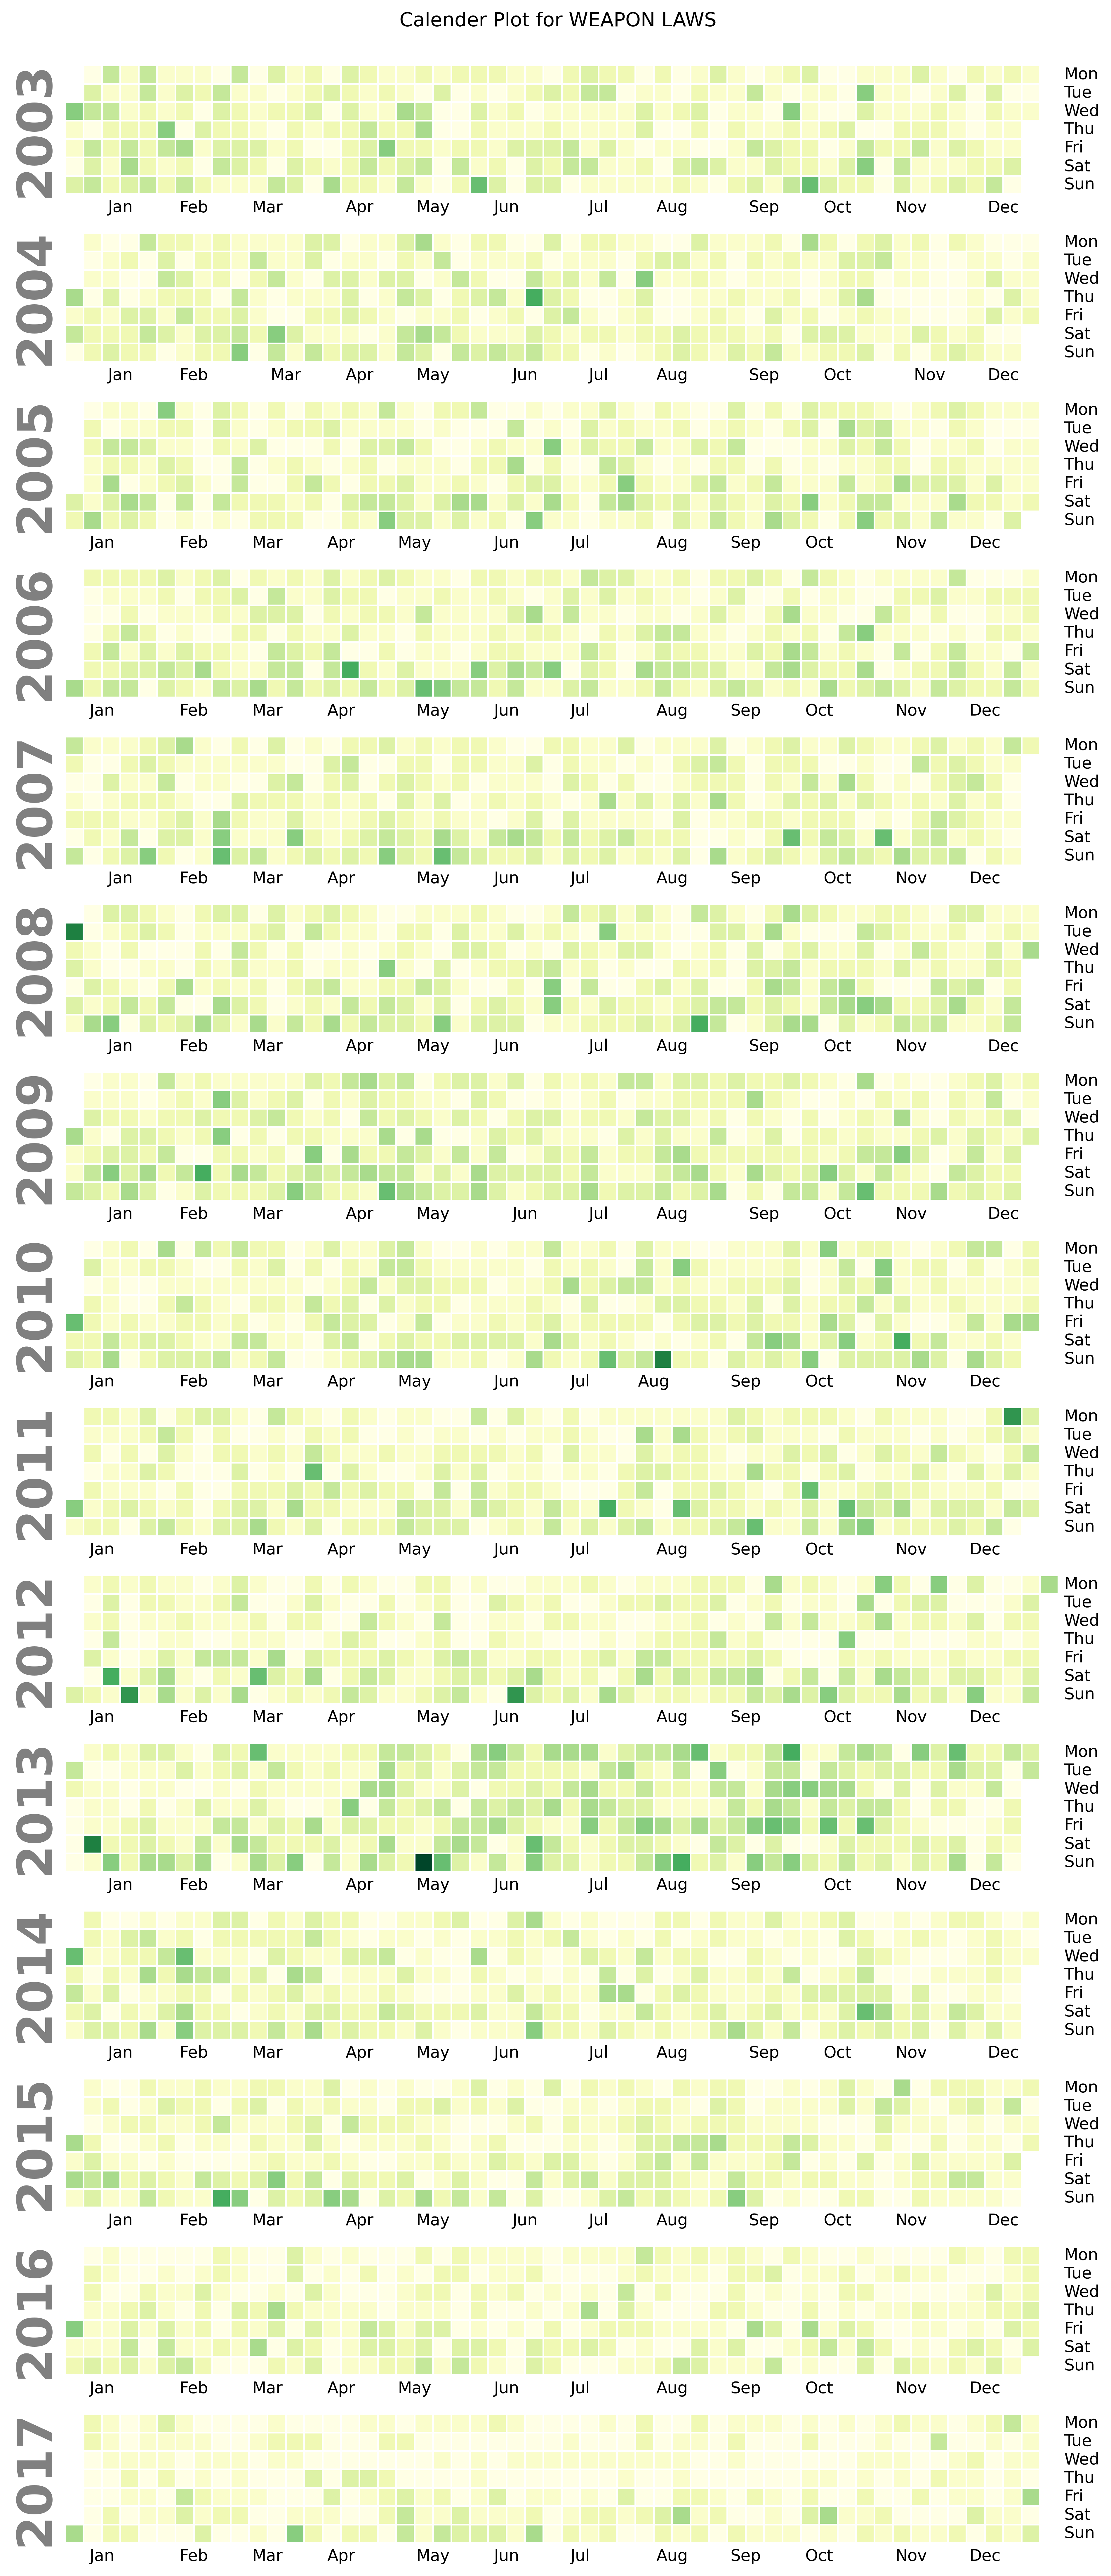

In [17]:
df_drunk = df[df.Category == 'DRUNKENNESS']
df_count = df_drunk.groupby(df_drunk['Date']).count()
calplot.calplot(df_count["IncidntNum"], cmap='YlGn', figsize=(10,22), edgecolor=None, 
                fig_kws=dict(dpi=400, layout='tight'), colorbar=False,
                suptitle="Calender Plot for WEAPON LAWS", linewidth=.8)
# calplot.calplot(df_count["IncidntNum"], cmap='YlGn', colorbar=False)

**P1.3**:Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

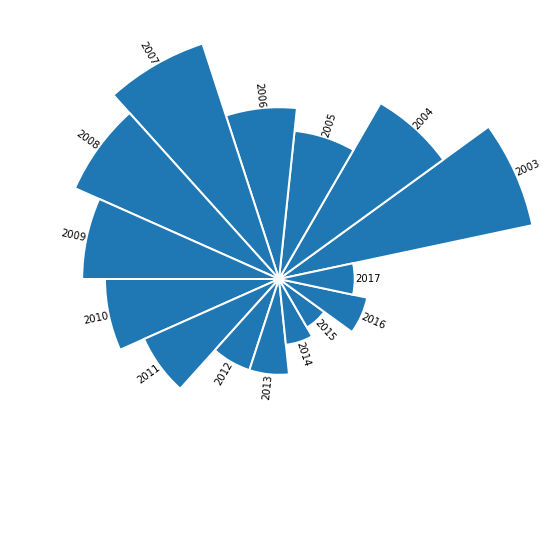

In [20]:
df = df[df.Category == 'PROSTITUTION']
df_count = df.groupby(df['Year']).count()
df_count["IncidntNum"]

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df_count["IncidntNum"].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_count.IncidntNum + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_count.IncidntNum)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_count.IncidntNum)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

labelPadding = 4

for bar, angle, height, label in zip(bars,angles, heights, df_count.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [21]:
import plotly.graph_objects as go

focus = 'PROSTITUTION'
year = 2015
df_ass_2015 = df[(df['Category']==focus) & (df['Year'] == year)]
ass_per_hour_2015 = df_ass_2015.groupby('Hour')[['IncidntNum']].count()

# Create polar barchart
fig = go.Figure(go.Barpolar(
    # set height of bars
    r=ass_per_hour_2015['IncidntNum'],
    # Evenly space bars
    width=360/24,
    opacity=0.4
))

tick_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
                "10", "11", "12", "13", "14", "15", "16", "17", "18", "19",
                "20", "21", "22", "23", " "] 
# Update some parameters for good looks
fig.update_layout(
    polar = dict(
        radialaxis = dict(range=[0, max(ass_per_hour_2015['IncidntNum'])], showticklabels=True, ticks='', linecolor='black'),
        angularaxis = dict(showticklabels=True,
            tickvals=np.linspace(0,360,25),
            ticktext=tick_labels,
            direction='clockwise',
            tickmode='array',
            ticks='')
    ),
    polar_angularaxis_rotation=90,
    showlegend=False
)

fig.show()

TypeError: 'int' object is not callable

## A1 Part 3: Visualizing geodata using Plotly
### Part 3.1 : Choropleth map

In [31]:
import plotly.express as px
df1 = df[df.Category == 'VEHICLE THEFT']
df_DayOfWeek = df1.groupby('DayOfWeek')
#data of sunday of vehicle theft
crime_crount = list(df_DayOfWeek)[3][1].groupby("PdDistrict").count()
crime_crount["District"]=crime_crount.index

In [32]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

fig = px.choropleth_mapbox(crime_crount, geojson=counties, locations='District', color='IncidntNum',
                           color_continuous_scale="Viridis",
                           range_color=(300, 3000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.7700, "lon": -122.4194},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**P3.2**: Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):

Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?

Why do you think perceptual errors are a problem? Try to think of a few examples.


In [33]:
fig = px.choropleth_mapbox(crime_crount, geojson=counties, locations='District', color='IncidntNum',
                           color_continuous_scale="Viridis",
                           range_color=(10, 100000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.7700, "lon": -122.4194},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# A1 Part 4: Errors in the data

In [5]:
from folium.plugins import HeatMap
import folium
df1 = df[df.Category == 'DRIVING UNDER THE INFLUENCE']
heat_data = [[row['Y'],row['X']] for index, row in df1.iterrows()]

map_hooray = folium.Map(location=[37.774940, -122.403715],
                  tiles = "Stamen Toner",
                    zoom_start = 18) 
HeatMap(heat_data).add_to(map_hooray)
map_hooray

## 下面是我自己最开始做的答案

In [ ]:
## day of week
DayOfWeek = df
DayOfWeek = DayOfWeek[['Category','DayOfWeek']].value_counts().reset_index(name='count')  # df

# sort(Category,DayOfWeek)
index = []
for i in range(len(DayOfWeek)):
    if DayOfWeek['Category'][i] not in focuscrimes:
        index.append(i) 

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
DayOfWeek_sorted = DayOfWeek.drop(index)
DayOfWeek_sorted['DayOfWeek'] = pd.Categorical(DayOfWeek_sorted['DayOfWeek'], categories=weekday, ordered=True)
DayOfWeek_sorted = DayOfWeek_sorted.sort_values(['Category','DayOfWeek'],ignore_index=True)

# plot
index_plot= []
# x's index
for i in range(0,len(DayOfWeek_sorted),7):
    index_plot.append(i)

fig, ax = plt.subplots(7,2, figsize=(12,20),sharex = True)
plt.suptitle('N. of crimes per week-day by category', fontsize=10)
for i in range(14):
    plt.xticks(rotation=90)
    lable = DayOfWeek_sorted['Category'][index_plot[i]]
    x = DayOfWeek_sorted['DayOfWeek'][index_plot[i]:index_plot[i]+7].tolist()
    y = DayOfWeek_sorted['count'][index_plot[i]:index_plot[i]+7].tolist()
    ax[i//2,i%2].bar(x,y)
    ax[i//2,i%2].set_ylabel("Crime count")
    ax[6,0].tick_params(axis='x', labelrotation = 90)
    ax[6,1].tick_params(axis='x', labelrotation = 90)
    ax[6,0].set_xlabel('Day of week')
    ax[6,1].set_xlabel('Day of week')
    ax[i//2,i%2].text(.05, .95, lable, transform=ax[i//2,i%2].transAxes,fontsize=8,ha="left", va="top")


In [ ]:
# 2.months plots

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_unsorted = df
months_unsorted["Date"] = months_unsorted["Date"].str.split("/", expand = True)[0] # date is replaced by month
# after this, df's date will be month only
months_unsorted = months_unsorted[['Category','Date']].value_counts().reset_index(name='count')  # df


index = []
for i in range(len(months_unsorted)):
    if months_unsorted['Category'][i] not in focuscrimes:
        index.append(i) 
months_sorted = months_unsorted.drop(index).sort_values(['Category','Date'],ignore_index=True)

# plot
index_plot= []
# x's index
for i in range(0,len(months_sorted),12):
    index_plot.append(i)

fig, ax = plt.subplots(7,2, figsize=(12,33),sharex = True)
plt.suptitle('N. of crimes per month by category', fontsize=10)
for i in range(14):
    plt.xticks(rotation=90)
    lable = months_sorted['Category'][index_plot[i]]
    x = months_sorted['Date'][index_plot[i]:index_plot[i]+12].tolist()
    y = months_sorted['count'][index_plot[i]:index_plot[i]+12].tolist()
    ax[i//2,i%2].bar(x,y)
    ax[i//2,i%2].set_ylabel("Crime count")
    ax[6,0].tick_params(axis='x', labelrotation = 90)
    ax[6,1].tick_params(axis='x', labelrotation = 90)
    ax[6,0].set_xlabel('Month')
    ax[6,1].set_xlabel('Month')
    ax[6,0].set_xticklabels(months)
    ax[6,1].set_xticklabels(months)
    ax[i//2,i%2].text(.05, .95, lable, transform=ax[i//2,i%2].transAxes,fontsize=8,ha="left", va="top")


In [ ]:
## the 24-hour cycle
hour = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hours = df
index = []
for i in range(len(hours)):
    if hours['Category'][i] not in focuscrimes:
        index.append(i)
hours_unsorted = hours.drop(index)
hours_unsorted['Time'] = pd.to_datetime(hours_unsorted['Time'], format='%H:%M').dt.strftime('%H')
hours_unsorted['Time'] = pd.Categorical(hours_unsorted['Time'], categories=hour, ordered=True)

hours_sorted = hours_unsorted.groupby(['Category','Time']).size().reset_index(name="count")
# plot
index_plot= []
# x's index
for i in range(0,len(hours_sorted),24):
    index_plot.append(i)

fig, ax = plt.subplots(7,2, figsize=(12,33),sharex = True)
plt.suptitle('N. of crimes per hour by category', fontsize=10)
for i in range(14):
    plt.xticks(rotation=90)
    lable = hours_sorted['Category'][index_plot[i]]
    x = hours_sorted['Time'][index_plot[i]:index_plot[i]+24].tolist()
    y = hours_sorted['count'][index_plot[i]:index_plot[i]+24].tolist()
    ax[i//2,i%2].bar(x,y)
    ax[i//2,i%2].set_ylabel("Crime count")
    ax[6,0].tick_params(axis='x', labelrotation = 90)
    ax[6,1].tick_params(axis='x', labelrotation = 90)
    ax[6,0].set_xlabel('Hour')
    ax[6,1].set_xlabel('Hour')
    ax[i//2,i%2].text(.05, .95, lable, transform=ax[i//2,i%2].transAxes,fontsize=8,ha="left", va="top")

In [ ]:
## the 168 hours of the week
week = pd.read_csv(filename) # because df's date was changed to month, I reset the dateframe
index = []
for i in range(len(week)):
    if week['Category'][i] not in focuscrimes:
        index.append(i) 
week_unsorted = week.drop(index).sort_values(['Category'],ignore_index=True)
timestamp = []
for i in range(len(week_unsorted)):
    timestamp.append(week_unsorted["Date"][i] + " " + week_unsorted["Time"][i])
week_unsorted['days'] = timestamp
week_unsorted['days'] = pd.to_datetime(week_unsorted['days'], format='%m/%d/%Y %H:%M')
week_unsorted['days'] = pd.to_datetime(week_unsorted['days'], format='%m/%d/%Y %H:%M')
start_date = '1-1-2016 00:00' 
end_date = '1-7-2016 23:59'
mask = (week_unsorted['days'] >= start_date) & (week_unsorted['days'] <= end_date)
week_data = week_unsorted.loc[mask]
# count by category and time interval
week_unsorted['Time'] = pd.to_datetime(week_data['Time']).dt.strftime('%H')
week_unsorted['Time'] = pd.Categorical(week_unsorted['Time'], categories=hour, ordered=True)
week_sorted = week_unsorted.groupby(['Category','Time']).size().reset_index(name="count")

In [ ]:
# plot
index_label = ['00:00-00:59','01:00-01:59','02:00-02:59','03:00-03:59',
               '04:00-04:59','05:00-05:59','06:00-06:59', '07:00-07:59',
                '08:00-08:59','09:00-09:59','10:00-10:59','11:00-11:59',
                '12:00-12:59','13:00-13:59','14:00-14:59','15:00-15:59',
                '16:00-16:59','17:00-17:59','18:00-18:59','19:00-19:59',
                '20:00-20:59','21:00-21:59','22:00-22:59','23:00-23:59']

fig, ax = plt.subplots(12,2, figsize=(12,33),sharex = True)
plt.suptitle('N. of crimes per 168hour by category', fontsize=10)
for i in range(24):
    index_plot= []
    for j in range(i,len(week_sorted),14):
        index_plot.append(j)
    plt.xticks(rotation=90)
    lable = index_label[i]
    x = week_sorted['Category'][index_plot].tolist()
    y = week_sorted['count'][index_plot].tolist()
    ax[i//2,i%2].bar(x,y)
    ax[i//2,i%2].set_ylabel("Crime count")
    ax[11,0].tick_params(axis='x', labelrotation = 90)
    ax[11,1].tick_params(axis='x', labelrotation = 90)
    ax[11,0].set_xlabel('Hour')
    ax[11,1].set_xlabel('Hour')
    ax[i//2,i%2].text(.05, .95, lable, transform=ax[i//2,i%2].transAxes,fontsize=8,ha="left", va="top")

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* Mention 10 examples of ways we can encode data.

The 10 ways mentioned is position, length, area, shape, color, angle, line weight, line ending, texture, pattern
1. Encoding data by positions: marking places on the map based on their latitude and longitude, x-axis and y-axis are the latitude and longitude of the bound of the area respectively.
2. Encoding data by length: plotting someone's height of each year, x-axis is the year, y axis-is the height of the years. It's a barchart.
3. Encoding data by area: marking the area where can fly the drone on the map of Copenhagen, x-axis and y-axis are the latitude and longitude of the bounds of the area respectively and color on internal area. It's an area plot.
4. Encoding data by shape: plotting the height and weight of the whole class, x-axis is the height and y-axis is the weight, using two different shape to represent the gender of students. It's a scatter plot.
5. Encoding data by color: plotting the popularity of different types of music during decade years, x-axis is the year and y-axis is the popularity level of the music, usint different color to represent the type of the music. It's a line plot.
6. Encoding data by angle: it's a pie chart. Plotting the percentage of daily expenses, and the angle represents the percentage of the item of daily expense.
7. Encoding data by line weight: plotting the social network of several classmates, the more frequently two classmates communicate, the thicker the connection line. It's a connected graph.
8. Encoding data by arrow on the end of the line: plotting the connection between a big family, adding the relationship on the arrow line. It's a directed graph.
9. Encoding data by texture: filling in textures representing different geographical features based on the area map.
10. Encoding data by pattern: marking the location of the hotel, restaurant and school on the map by using the pattern of hotel, restaurant and scholl.

* Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

Answer: No, they are not equally. Like the calendar heatmaps from the week2, it's encoding by the color intensity and it can highlight the trends and anomalies over time. Other types of plots can't clearly and directly represent three dimensional, i.e. months, day of week, level(color intensity), on one graph.

* Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

Answer: They are angle, area/size and color intensity. The example is: [Spatial Heat Map Example: Displays temperature across a world image with red being the highest and blue being the lowest degree in temperatures (5 April 2019)](https://upload.wikimedia.org/wikipedia/commons/e/e7/World_heat_map.png).

* Explain in your own words: What is the problem with pie-charts?

Answers:
1. They are difficult to identify the tiny differents between attributes;
2. They are hard to compare the different pie-charts because the angles are the proportion of different whole;
3. They are not easy for people eyes to understand;
4. They might ignore the small but important part;
5. They need many lables to mark what they mean.

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.

In [6]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
letters_used = {letter for letter in "hello"}
letters_used

{'e', 'h', 'l', 'o'}